Вам даны данные результатов ЕГЭ по различным предметам. Выполните следующие действия:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.Загрузите данные в ноутбук

In [2]:
def exam_reader(var: int):
    return pd.read_excel(
        f'Вариант {var}.xlsx',
        header=2,
        index_col=0,
        skipfooter=1
    )

exams = pd.Series(
    [exam_reader(i) for i in range(1,5)],
    index=['rus', 'math', 'physics', 'informatics']
)
exams

rus                  № школы Класс Пол  Номер варианта  Задан...
math                 № школы Класс Пол  Номер варианта Задани...
physics              № школы Класс Пол  Номер варианта    Зад...
informatics         № школы Класс Пол  Номер варианта Задания...
dtype: object

### 2.Сделайте описательную статистику по набранному баллу

In [3]:
stat = exams.apply(lambda x: x['Балл'].describe())
stat

,count,mean,std,min,25%,50%,75%,max
rus,3048.0,72.769029,13.664908,20.0,64.0,72.0,82.00,100.0
math,2356.0,49.255093,17.880420,5.0,33.0,50.0,68.00,96.0
physics,1180.0,52.047458,14.965477,10.0,41.0,49.0,60.25,100.0
informatics,141.0,60.780142,19.419832,0.0,50.0,64.0,75.00,100.0


###  3.Найдите процент учащихся, выполнивших работу ниже среднего

In [172]:
pd.concat(
    [exams, stat['mean']],
    axis=1
).apply(
    lambda row: row[0].Балл[row[0].Балл < row['mean']].count() /
    row[0].shape[0] * 100,
    axis=1
)

rus            51.279528
math           48.005093
physics        56.271186
informatics    46.099291
dtype: float64

### 4.Найти процент учащихся не сдавших экзамен

In [11]:
exams.apply(
    lambda subj: (subj["Балл"] < subj["Минимальный балл"]).sum()/subj.shape[0] *100
)

rus             0.131234
math            9.210526
physics         7.711864
informatics    11.347518
dtype: float64

### 5.Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

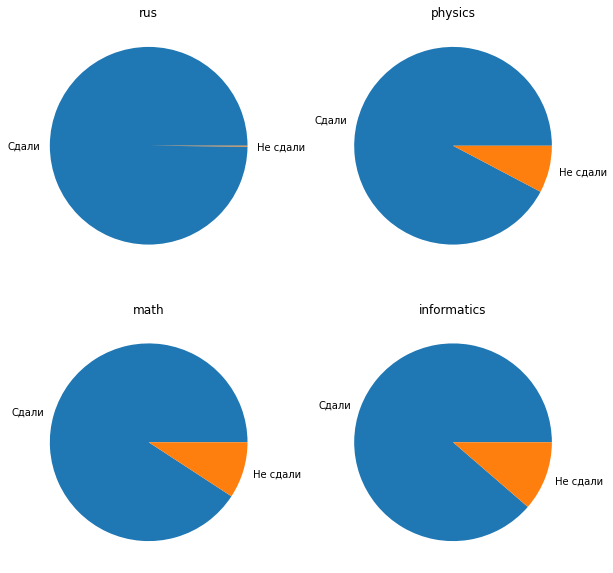

In [20]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
for i in range(2):
    for j in range(2):
        ax[i,j].set_title(exams.index[i+j*2])
        passed = (exams.iloc[i+j*2]["Балл"] >= exams.iloc[i+j*2]["Минимальный балл"]).sum()
        failed = (exams.iloc[i+j*2]["Балл"] < exams.iloc[i+j*2]["Минимальный балл"]).sum()
        ax[i,j].pie((passed, failed),labels = ['Сдали','Не сдали'])

### 6.Постройте ядерную оценку плотности распределению баллов за экзамен

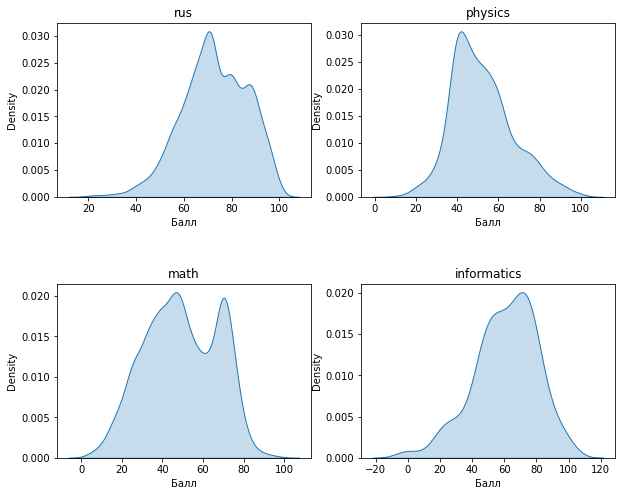

In [23]:
fig, ax = plt.subplots(2,2, figsize=(10,8))
plt.subplots_adjust(hspace=0.5)
for i in range(2):
    for j in range(2):
        ax[i,j].set_title(exams.index[i+j*2])
        sns.kdeplot(ax=ax[i, j], data=exams.iloc[i+j*2]["Балл"], shade=True)
plt.show()

### 7.Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [43]:
borders = {'rus':[35,58,72],
         'math':[27,47,65],
         'physics':[36,54,68],
         'informatics':[40,57,73]}

def marks(x, subj):
    if x >= borders[subj][0] and x<borders[subj][1]:
        return 'удовлетворительно'
    elif x >= borders[subj][1] and x<borders[subj][2]:
        return 'хорошо'
    elif x >= borders[subj][2]:
        return 'отлично'
    else:
        return 'неудовлетворительно'

In [56]:
new_frame = pd.DataFrame(index=exams.index, columns=[
    "неудовлетворительно",
    'удовлетворительно',
    'хорошо',
    'отлично'
])

In [57]:
for indx, subj in exams.iteritems():
    new_frame.loc[indx] = subj["Балл"].apply(lambda x:marks(x,indx)).value_counts(normalize=True)*100

In [59]:
new_frame

,неудовлетворительно,удовлетворительно,хорошо,отлично
rus,0.688976,13.353018,32.644357,53.313648
math,9.210526,38.794567,26.400679,25.594228
physics,7.711864,51.440678,24.915254,15.932203
informatics,11.347518,26.241135,31.914894,30.496454


### 8.Какое процентное соотношение юношей и девушек писало данный экзамен?

In [62]:
exams.apply(
    lambda subj: subj["Пол"].value_counts(normalize=True) * 100
)

,Ж,М
rus,57.972441,42.027559
math,52.843803,47.156197
physics,31.355932,68.644068
informatics,22.695035,77.304965


### 9.Сколько школ принимало участие в экзамене?

In [66]:
exams.apply(
    lambda subj: subj["№ школы"].dropna().unique().shape[0]
)

rus            24
math           17
physics        19
informatics    10
dtype: int64